<a href="https://colab.research.google.com/github/Nathtaba/Classificador_Sentimentos_ML/blob/main/ClassificadorSentimentos_Avaliacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk import tokenize
import seaborn as sns
from string import punctuation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#Leitura da basa
dt = pd.read_csv("b2w.csv")
dt.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4.0,1.0,1.0
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5.0,1.0,1.0
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1.0,1.0,1.0
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5.0,1.0,1.0
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3.0,-1.0,1.0


In [28]:
dt.describe()

,original_index,polarity,rating,kfold_polarity,kfold_rating
count,37393.000000,32710.000000,37392.000000,37392.000000,37392.000000
mean,66378.952799,0.690034,3.485772,1.567982,1.937901
std,38200.119349,0.462486,1.532880,1.226673,0.801329
min,3.000000,0.000000,1.000000,-1.000000,1.000000
25%,33373.000000,0.000000,2.000000,1.000000,1.000000
50%,66419.000000,1.000000,4.000000,2.000000,2.000000
75%,99413.000000,1.000000,5.000000,3.000000,3.000000
max,132369.000000,1.000000,5.000000,3.000000,3.000000


In [29]:
#Removendo as colunas que não serão usadas
avaliacoes = dt.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis=1)

In [30]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [31]:
avaliacoes.shape

(37393, 2)

In [32]:
#Remove valores nulos
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0


In [33]:
avaliacoes['polarity'].value_counts()

polarity
1.0    22571
0.0    10139
Name: count, dtype: int64

In [34]:
#Vetorizando os dados
vetorizar = CountVectorizer(max_features=100) #limitando a 100 palavras
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(32710, 100)


In [35]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100)
  bag_of_words = vetorizar.fit_transform(dados[coluna_texto])
  X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, dados[coluna_sentimento],stratify=dados[coluna_sentimento],random_state = 42)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(X_treino, y_treino)
  return regressao_logistica.score(X_teste, y_teste)


In [36]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8862802641232576


In [37]:
todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

Criando a Word Cloud

In [38]:
nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

In [39]:
nuvem_palavras

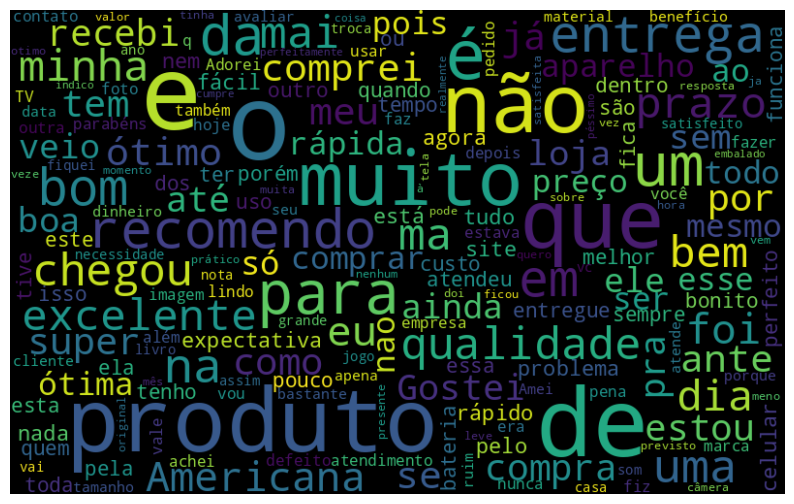

In [40]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
avaliacoes.query("polarity == 1")

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
6,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...",1.0
...,...,...
37383,produto entregue dentro do prazo estabelecido....,1.0
37384,NAO É JUSTO ONTEM A NOITE ESTAVA 1699.00 HOJE ...,1.0
37386,A impressora atendeu minhas expectativas. Impr...,1.0
37389,Balança atendeu bem as expectativas. Compacta ...,1.0


In [42]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 0")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [43]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query("polarity == 1")
  todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

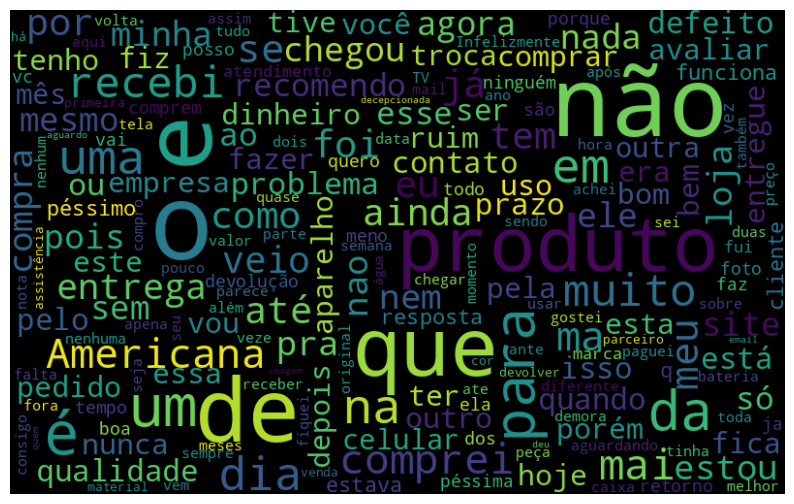

In [44]:
#Word CLoud Negativo
word_cloud_neg(avaliacoes, "review_text")

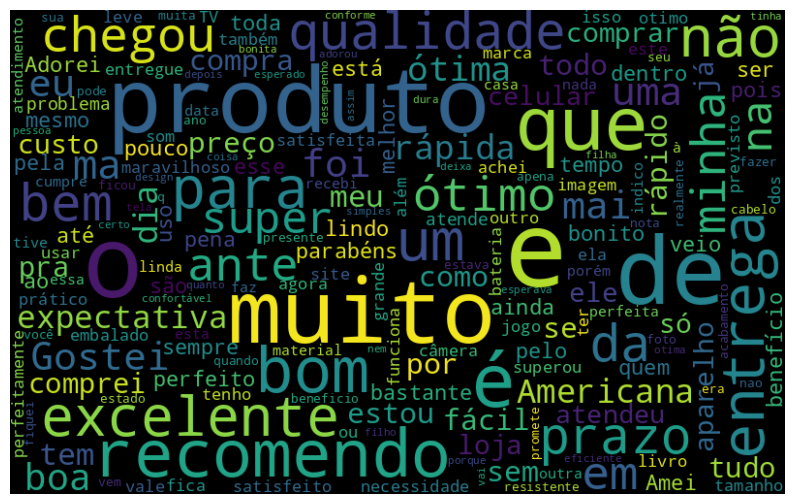

In [45]:
# Word Cloud Positivo
word_cloud_pos(avaliacoes, "review_text")

NLTK

In [49]:
token_por_espaço = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaço.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)

In [50]:
frequencia

FreqDist({'e': 25120, 'o': 21310, 'de': 21275, 'a': 18655, 'que': 15187, 'não': 12594, 'do': 10456, 'é': 10239, 'muito': 10233, 'produto': 9978, ...})

In [52]:
#Gerar uma tabela com a quantidade de cada palavra
dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                    "Frequencia": list(frequencia.values())})
dataframe_frequencia

,Palavra,Frequencia
0,Bem,118
1,macio,60
2,e,25120
3,felpudo...recomendo.,1
4,Preço,81
...,...,...
61200,"04/04/2018,",1
61201,corretos,1
61202,"compradora,",1
61203,quebrado....Aguardando,1


In [53]:
#Ordena pelo maior da coluna frequencia
dataframe_frequencia.nlargest(columns = "Frequencia", n = 10)

,Palavra,Frequencia
2,e,25120
20,o,21310
17,de,21275
39,a,18655
50,que,15187
33,não,12594
23,do,10456
60,é,10239
43,muito,10233
21,produto,9978


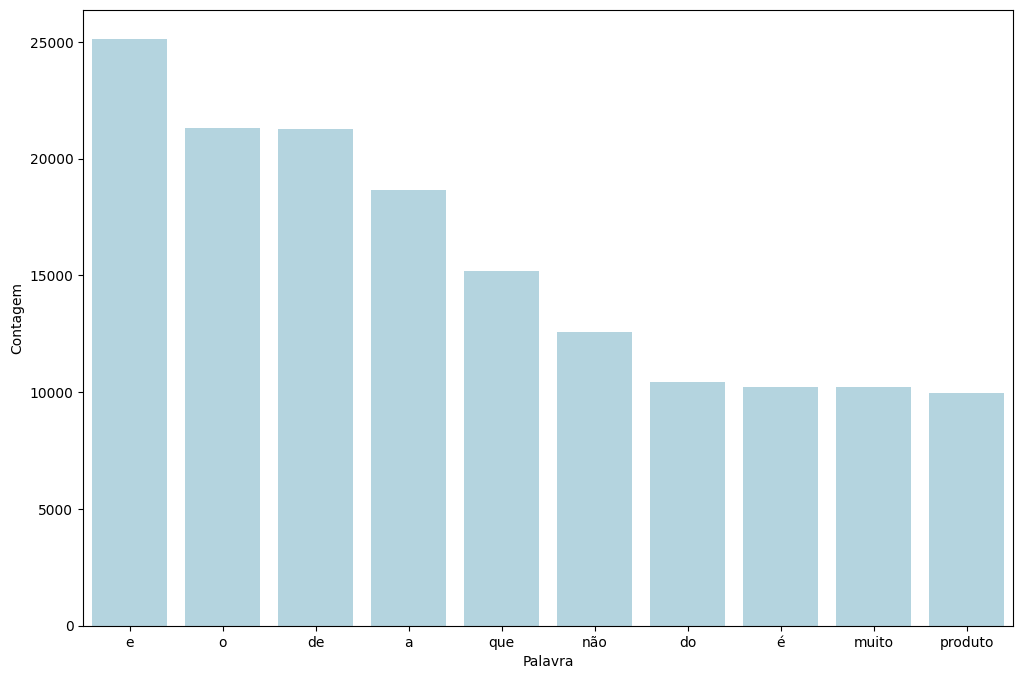

In [55]:
#Gerar grafico da tabela de frequencia
plt.figure(figsize=(12,8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns = "Frequencia", n = 10),
                 x = "Palavra", y = "Frequencia", color = "lightblue")
ax.set(ylabel = "Contagem")
plt.show()

In [56]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_frase = token_por_espaço.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                    "Frequencia": list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns = "Frequencia",
                                                       n = quantidade)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = dataframe_frequencia,
                  x = "Palavra", y = "Frequencia", color = "lightblue")
  ax.set(ylabel = "Contagem")
  plt.show()

In [62]:
#Retirar os stop words
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [63]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [64]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaço.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords"] = frase_processada

In [71]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo...recomendo. Preço imbatível...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional! recomendo!!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio. Adequado pessoas fazem us...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...","ótmo produto atendeu expectativas, entrega oco..."


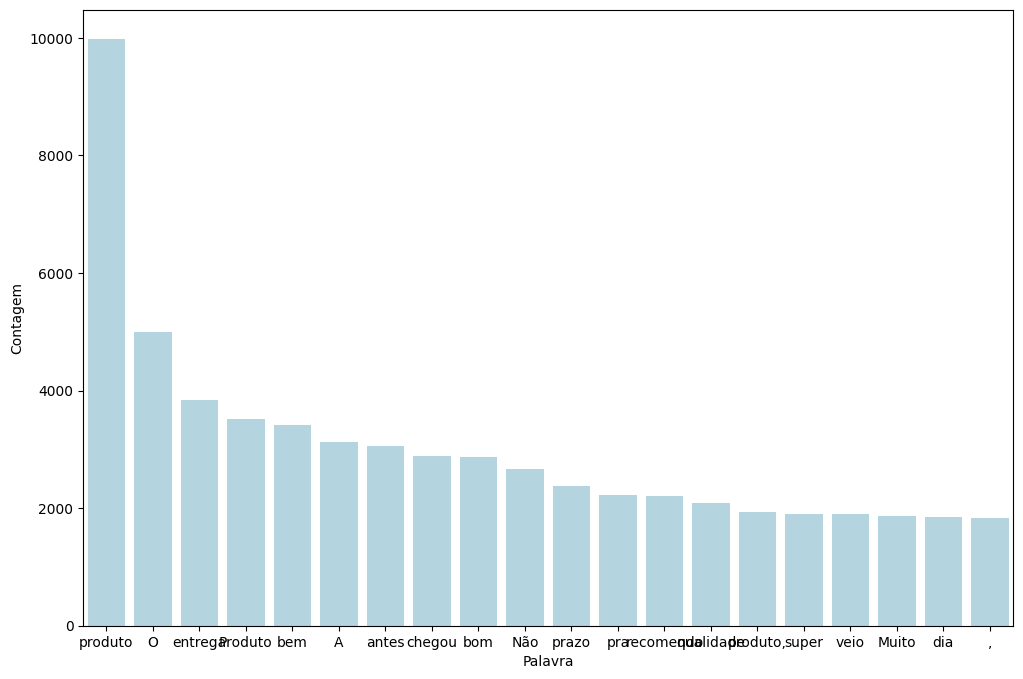

In [66]:
grafico(avaliacoes, "texto_sem_stopwords", 20)

In [68]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [70]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto = token_por_espaço.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao"] = frase_processada

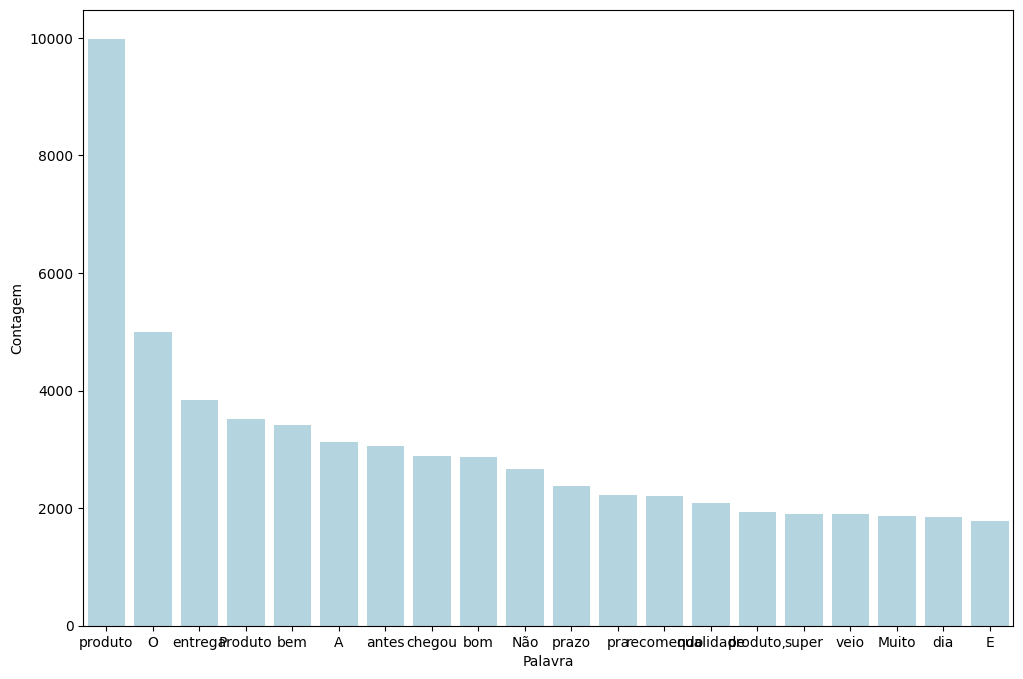

In [72]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 20)

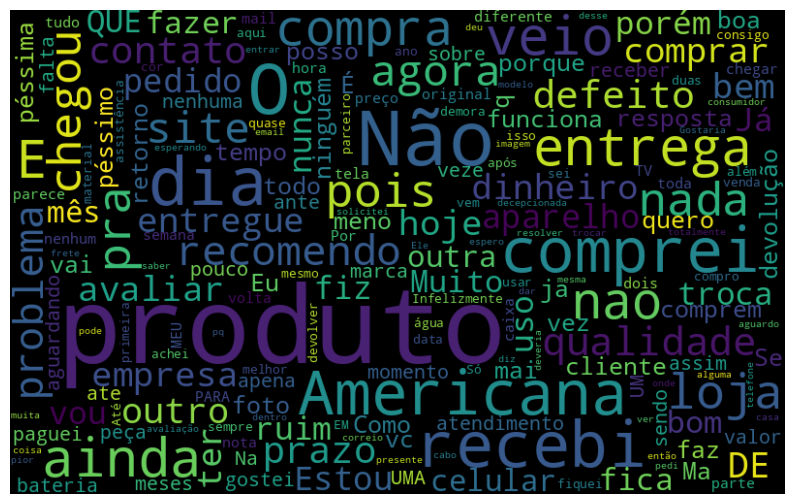

In [73]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao")

In [74]:
print(treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao", "polarity"))

0.880166299828809
